<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/TimeSeries/20210312_Jan24-25_hmmlearn_std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/urban_heat/colabnb/kmlee/

/content/drive/.shortcut-targets-by-id/1kvbRVbtsNfOtjX32jnBD86WXtnpvg0k-/urban_heat/colabnb/kmlee


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Change xaxis
from sir_utils import *

In [5]:
fpaths = pd.read_feather("/content/drive/MyDrive/urban_heat/output/file_paths_times.feather")
fpaths["hour"] = fpaths.times.values.astype(str)
fpaths

,paths,times,fnames_npy,hour
0,01-24/snap-2020-01-24T00-00-07.45.jpeg,2020-01-24 00:00:07.450,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:07.450000000
1,01-24/snap-2020-01-24T00-00-17.50.jpeg,2020-01-24 00:00:17.500,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:17.500000000
2,01-24/snap-2020-01-24T00-00-27.53.jpeg,2020-01-24 00:00:27.530,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:27.530000000
3,01-24/snap-2020-01-24T00-00-37.57.jpeg,2020-01-24 00:00:37.570,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:37.570000000
4,01-24/snap-2020-01-24T00-00-47.61.jpeg,2020-01-24 00:00:47.610,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:47.610000000
...,...,...,...,...
414748,03-15/snap-2020-03-15T23-59-11.49.jpeg,2020-03-15 23:59:11.490,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:11.490000000
414749,03-15/snap-2020-03-15T23-59-21.52.jpeg,2020-03-15 23:59:21.520,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:21.520000000
414750,03-15/snap-2020-03-15T23-59-31.56.jpeg,2020-03-15 23:59:31.560,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:31.560000000
414751,03-15/snap-2020-03-15T23-59-41.61.jpeg,2020-03-15 23:59:41.610,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:41.610000000


In [8]:
fpaths = pd.read_feather("/content/drive/MyDrive/urban_heat/output/file_paths_times.feather")
fpaths["hour"] = fpaths.times.values.astype(str)
fpaths

,paths,times,fnames_npy,hour
0,01-24/snap-2020-01-24T00-00-07.45.jpeg,2020-01-24 00:00:07.450,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:07.450000000
1,01-24/snap-2020-01-24T00-00-17.50.jpeg,2020-01-24 00:00:17.500,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:17.500000000
2,01-24/snap-2020-01-24T00-00-27.53.jpeg,2020-01-24 00:00:27.530,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:27.530000000
3,01-24/snap-2020-01-24T00-00-37.57.jpeg,2020-01-24 00:00:37.570,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:37.570000000
4,01-24/snap-2020-01-24T00-00-47.61.jpeg,2020-01-24 00:00:47.610,singapore_ir_npy/singapore_ir_000000_000500.npy,2020-01-24T00:00:47.610000000
...,...,...,...,...
414748,03-15/snap-2020-03-15T23-59-11.49.jpeg,2020-03-15 23:59:11.490,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:11.490000000
414749,03-15/snap-2020-03-15T23-59-21.52.jpeg,2020-03-15 23:59:21.520,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:21.520000000
414750,03-15/snap-2020-03-15T23-59-31.56.jpeg,2020-03-15 23:59:31.560,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:31.560000000
414751,03-15/snap-2020-03-15T23-59-41.61.jpeg,2020-03-15 23:59:41.610,singapore_ir_npy/singapore_ir_414500_415000.npy,2020-03-15T23:59:41.610000000


In [9]:
fpaths[fpaths["hour"] == "2020-02-22T"]

,paths,times,fnames_npy,hour


In [10]:
fpaths[fpaths["paths"].str.contains('02-22/snap')]

,paths,times,fnames_npy,hour
249723,02-22/snap-2020-02-22T00-00-02.43.jpeg,2020-02-22 00:00:02.430,singapore_ir_npy/singapore_ir_249500_250000.npy,2020-02-22T00:00:02.430000000
249724,02-22/snap-2020-02-22T00-00-12.47.jpeg,2020-02-22 00:00:12.470,singapore_ir_npy/singapore_ir_249500_250000.npy,2020-02-22T00:00:12.470000000
249725,02-22/snap-2020-02-22T00-00-22.51.jpeg,2020-02-22 00:00:22.510,singapore_ir_npy/singapore_ir_249500_250000.npy,2020-02-22T00:00:22.510000000
249726,02-22/snap-2020-02-22T00-00-32.55.jpeg,2020-02-22 00:00:32.550,singapore_ir_npy/singapore_ir_249500_250000.npy,2020-02-22T00:00:32.550000000
249727,02-22/snap-2020-02-22T00-00-42.59.jpeg,2020-02-22 00:00:42.590,singapore_ir_npy/singapore_ir_249500_250000.npy,2020-02-22T00:00:42.590000000
...,...,...,...,...
253363,02-22/snap-2020-02-22T10-09-03.65.jpeg,2020-02-22 10:09:03.650,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-22T10:09:03.650000000
253364,02-22/snap-2020-02-22T10-09-13.69.jpeg,2020-02-22 10:09:13.690,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-22T10:09:13.690000000
253365,02-22/snap-2020-02-22T10-09-23.72.jpeg,2020-02-22 10:09:23.720,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-22T10:09:23.720000000
253366,02-22/snap-2020-02-22T10-09-33.76.jpeg,2020-02-22 10:09:33.760,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-22T10:09:33.760000000


In [11]:
fpaths[fpaths["paths"].str.contains('02-23/snap')]

,paths,times,fnames_npy,hour


In [12]:
fpaths[fpaths["paths"].str.contains('02-24/snap')]

,paths,times,fnames_npy,hour


In [13]:
fpaths[fpaths["paths"].str.contains('02-25/snap')]

,paths,times,fnames_npy,hour


In [14]:
fpaths[fpaths["paths"].str.contains('02-26/snap')]

,paths,times,fnames_npy,hour
253368,02-26/snap-2020-02-26T00-00-07.95.jpeg,2020-02-26 00:00:07.950,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-26T00:00:07.950000000
253369,02-26/snap-2020-02-26T00-00-17.99.jpeg,2020-02-26 00:00:17.990,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-26T00:00:17.990000000
253370,02-26/snap-2020-02-26T00-00-28.04.jpeg,2020-02-26 00:00:28.040,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-26T00:00:28.040000000
253371,02-26/snap-2020-02-26T00-00-38.08.jpeg,2020-02-26 00:00:38.080,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-26T00:00:38.080000000
253372,02-26/snap-2020-02-26T00-00-48.12.jpeg,2020-02-26 00:00:48.120,singapore_ir_npy/singapore_ir_253000_253500.npy,2020-02-26T00:00:48.120000000
...,...,...,...,...
261969,02-26/snap-2020-02-26T23-59-16.08.jpeg,2020-02-26 23:59:16.080,singapore_ir_npy/singapore_ir_261500_262000.npy,2020-02-26T23:59:16.080000000
261970,02-26/snap-2020-02-26T23-59-26.12.jpeg,2020-02-26 23:59:26.120,singapore_ir_npy/singapore_ir_261500_262000.npy,2020-02-26T23:59:26.120000000
261971,02-26/snap-2020-02-26T23-59-36.17.jpeg,2020-02-26 23:59:36.170,singapore_ir_npy/singapore_ir_261500_262000.npy,2020-02-26T23:59:36.170000000
261972,02-26/snap-2020-02-26T23-59-46.20.jpeg,2020-02-26 23:59:46.200,singapore_ir_npy/singapore_ir_261500_262000.npy,2020-02-26T23:59:46.200000000


In [15]:
fpaths = pd.read_feather("/content/drive/MyDrive/urban_heat/output/file_paths_times.feather")
fpaths["hour"] = fpaths.times.values.astype(str)

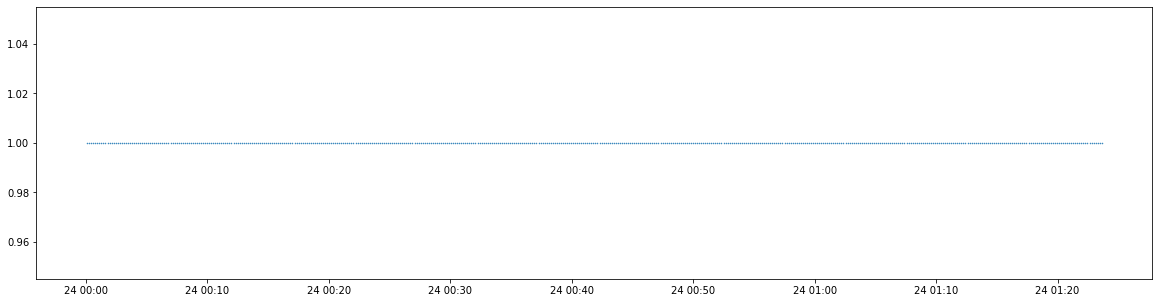

In [16]:
plt.figure(figsize=(20,5))
plt.plot(fpaths.times[:500], np.ones(500), ".", markersize=1)

In [23]:
# -- set start and end time
st = "2020-01-24 19:00:00"
en = "2020-01-25 04:00:00"

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub = fpaths[(fpaths.times >= st) & (fpaths.times < en)]

for i in list(fpaths_sub.index):
  fpaths_sub.hour[i] = fpaths_sub.hour[i].split("T")[1].split(".")[0]

fpaths_sub["xaxis"] = list(range(fpaths_sub.shape[0]))

# -- pull out times
times = fpaths_sub.times.values
hour = fpaths_sub.hour.values

# -- get the numpy file names
fnames_npy = np.unique(fpaths_sub.fnames_npy)

# -- initialize the imgs list
imgs = []

# -- read in each file
for ii, fname in enumerate(fnames_npy):
  print("reading file {0} ({1} of {2})".format(fname, ii + 1, len(fnames_npy)))

  # -- get indices only for those images we want to keep for this file
  ind = fpaths_sub[fpaths_sub.fnames_npy == fname].index % 500

  # -- append the kept images from this file to the images list
  imgs.append(np.load("/content/drive/MyDrive/urban_heat/data/singapore_ir/" + fname)[ind])

# -- concatentate to an array
imgs = np.concatenate(imgs, axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

reading file singapore_ir_npy/singapore_ir_006500_007000.npy (1 of 8)
reading file singapore_ir_npy/singapore_ir_007000_007500.npy (2 of 8)
reading file singapore_ir_npy/singapore_ir_007500_008000.npy (3 of 8)
reading file singapore_ir_npy/singapore_ir_008000_008500.npy (4 of 8)
reading file singapore_ir_npy/singapore_ir_008500_009000.npy (5 of 8)
reading file singapore_ir_npy/singapore_ir_009000_009500.npy (6 of 8)
reading file singapore_ir_npy/singapore_ir_009500_010000.npy (7 of 8)
reading file singapore_ir_npy/singapore_ir_010000_010500.npy (8 of 8)


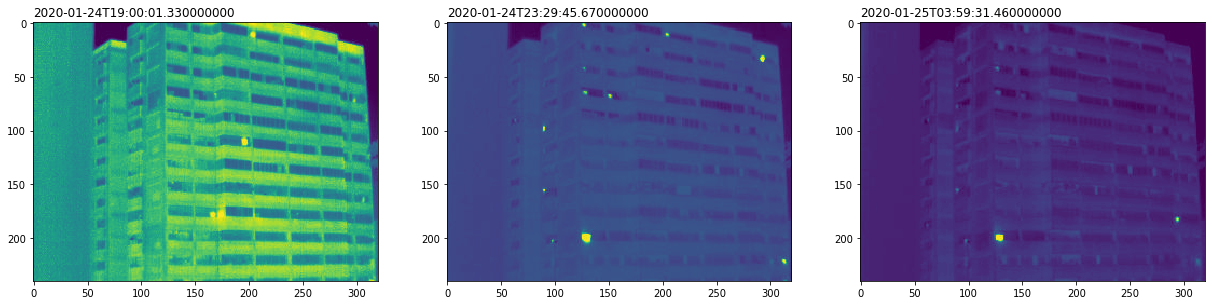

In [24]:
fig, ax = plt.subplots(1,3, figsize=(21,7))
ax[0].imshow(imgs[0], interpolation="nearest")
ax[0].set_title(times[0], loc="left")

ax[1].imshow(imgs[1612], interpolation="nearest")
ax[1].set_title(times[1612], loc="left")

ax[2].imshow(imgs[3224], interpolation="nearest")
ax[2].set_title(times[3224], loc="left")

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Brightness')

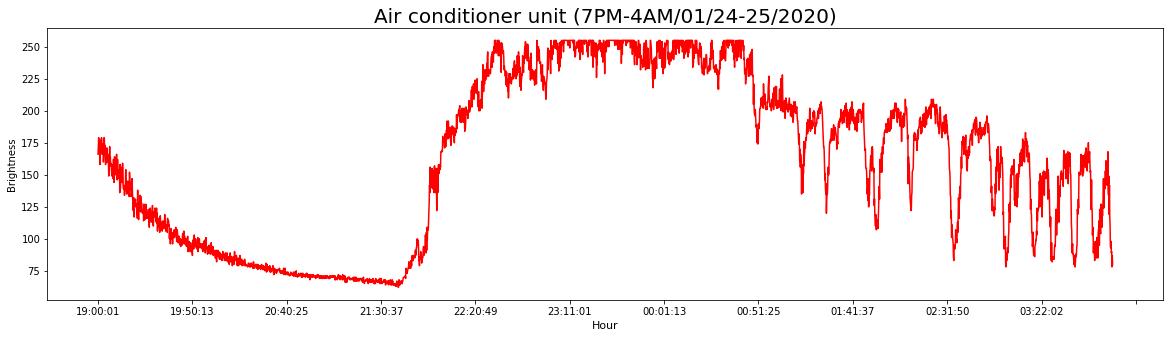

In [25]:
X = fpaths_sub.hour # Needed for xaxis
Y = imgs[:, 200, 125]

plt.figure(figsize=(20,5))
plt.plot(X, Y, color="red")
plt.title("Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=11)
ax.set_ylabel("Brightness")
#ax.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


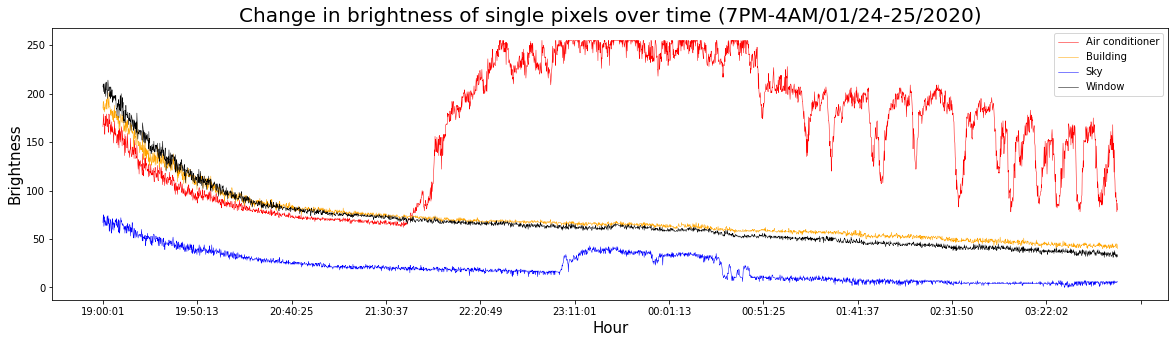

In [26]:
X = fpaths_sub.hour # Needed for xaxis
Y_acs = imgs[:, 200, 125]
Y_bld = imgs[:, 100, 175]
Y_sky = imgs[:, 10, 280]
Y_win = imgs[:, 140, 200]

plt.figure(figsize=(20,5))
plt.plot(X, Y_acs, color="Red", label="Air conditioner", linewidth=0.5)
plt.plot(X, Y_bld, color="Orange", label="Building", linewidth=0.5)
plt.plot(X, Y_sky, color="Blue", label = "Sky", linewidth=0.5)
plt.plot(X, Y_win, color="Black", label = "Window", linewidth=0.5)
plt.title("Change in brightness of single pixels over time (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Brightness", fontsize=15)
plt.legend(loc="best")

#Make Features

In [27]:
# -- read in the labeled pixels 
acs = np.load("/content/drive/My Drive/urban_heat/output/acs_pix.npy")
bld = np.load("/content/drive/My Drive/urban_heat/output/bld_pix_150.npy")
sky = np.load("/content/drive/My Drive/urban_heat/output/sky_pix_20201112.npy")
win = np.load("/content/drive/My Drive/urban_heat/output/win_pix_150.npy")

# -- convert to pixel numbers
acs_col, acs_row = acs.round().astype(int).T
bld_col, bld_row = bld.round().astype(int).T
sky_col, sky_row = sky.round().astype(int).T
win_col, win_row = win.round().astype(int).T

# -- extract features from images
feat_acs_np = imgs[:, acs_row, acs_col].T
feat_bld_np = imgs[:, bld_row, bld_col].T
feat_sky_np = imgs[:, sky_row, sky_col].T
feat_win_np = imgs[:, win_row, win_col].T

# -- determine the shape of these images so that we know how to set up the convnet
acs_sh = acs.shape
bld_sh = bld.shape
sky_sh = sky.shape
win_sh = win.shape
acs_sh, bld_sh, sky_sh, win_sh

((30, 2), (150, 2), (30, 2), (150, 2))

Text(0.0, 1.0, 'Window')

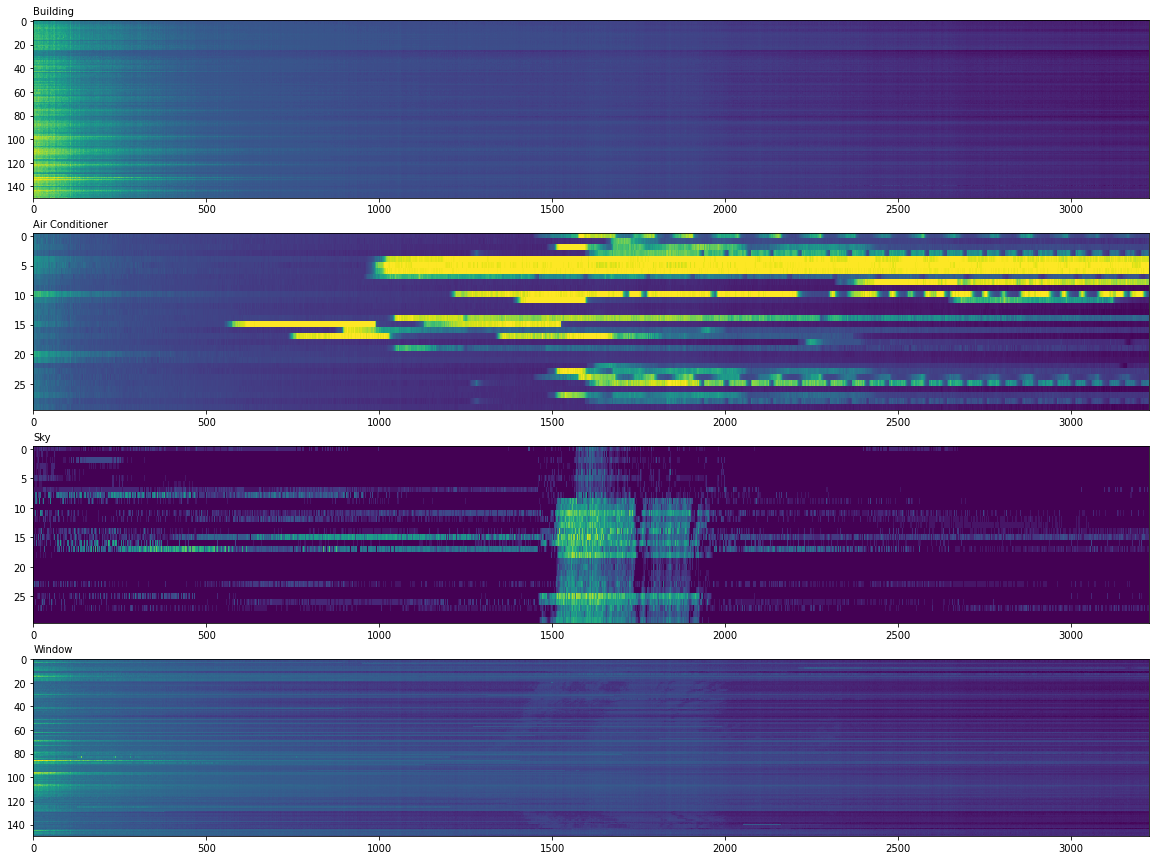

In [28]:
#Figure
fig, ax = plt.subplots(4,1, figsize=(20,15))
ax[0].imshow(feat_bld_np, aspect="auto", interpolation="nearest")
ax[0].set_title("Building", fontsize=10, loc="left")

ax[1].imshow(feat_acs_np, aspect="auto", interpolation="nearest")
ax[1].set_title("Air Conditioner", fontsize=10, loc="left")

ax[2].imshow(feat_sky_np, aspect="auto", interpolation="nearest")
ax[2].set_title("Sky", fontsize=10, loc="left")

ax[3].imshow(feat_win_np, aspect="auto", interpolation="nearest")
ax[3].set_title("Window", fontsize=10, loc="left")

#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
#ax.set_xlabel("Hour", fontsize=15)
#ax.set_ylabel("Number of features", fontsize=15)
#plt.legend(loc="best")

In [29]:
# Make features
# Air conditioner

feat_acs = []

for ii in range(len(acs_row)):
  trow = acs_row[ii]
  tcol = acs_col[ii]
  feat_acs.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_acs = np.array(feat_acs)
print(feat_acs.shape)

# Building
feat_bld = []

for ii in range(len(bld_row)):
  trow = bld_row[ii]
  tcol = bld_col[ii]
  feat_bld.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_bld = np.array(feat_bld)
print(feat_bld.shape)

# Sky
feat_sky = []

for ii in range(len(sky_row)):
  trow = sky_row[ii]
  tcol = sky_col[ii]
  feat_sky.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_sky = np.array(feat_sky)
print(feat_sky.shape)

# Window
feat_win = []

for ii in range(len(win_row)):
  trow = win_row[ii]
  tcol = win_col[ii]
  feat_win.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_win = np.array(feat_win)
print(feat_win.shape)

(30, 11, 11, 3227)
(150, 11, 11, 3227)
(30, 11, 11, 3227)
(150, 11, 11, 3227)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


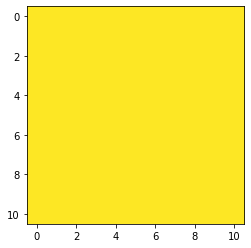

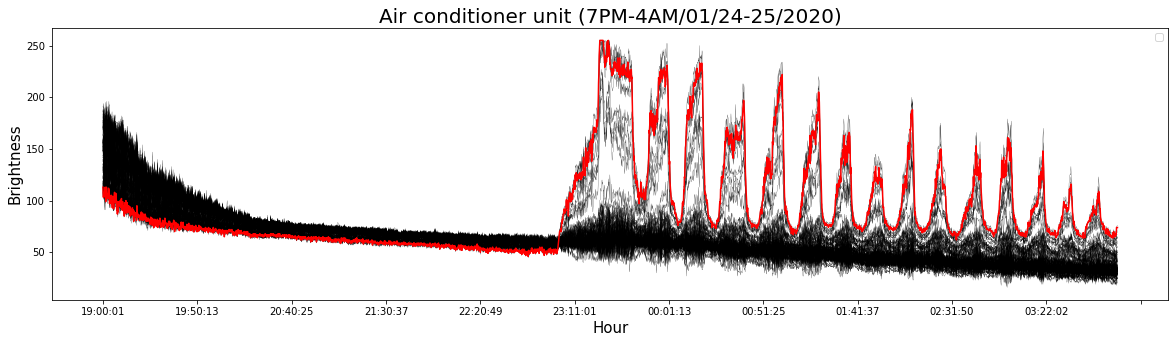

In [30]:
ind = 0 #pick one pixel from features

#Figure1
plt.imshow(feat_acs[ind][:, :, 90], clim=[0, 1])
#Figure2
plt.figure(figsize=(20,5))
dum = plt.plot(fpaths_sub.hour, feat_acs[ind].reshape(121, 3227).T, "k", lw=0.2)
dum = plt.plot(fpaths_sub.hour, feat_acs[ind][5, 5], "r")
plt.title("Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Brightness", fontsize=15)
plt.legend(loc="best")

#Change Point Detection

In [83]:
!pip install ruptures
!pip install changefinder

     |████████████████████████████████| 921kB 8.8MB/s 
     |████████████████████████████████| 163kB 7.2MB/s 
  Created wheel for changefinder: filename=changefinder-0.3-cp37-none-any.whl size=3823 sha256=ff49a4deab3fa7d1717f32f9a146bb38064a16211555e587b5ae3bb5ffa25de7
  Stored in directory: /root/.cache/pip/wheels/ab/1c/de/3c0c0e4a6ee252b83ae19b252f3ae4f0a8ba4799c253afbd92
Successfully built changefinder


In [84]:
import ruptures as rpt
import changefinder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


References:

coding: https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/

A review of change point detection: https://www.researchgate.net/publication/322221081_A_review_of_change_point_detection_methods

[Link](https://)


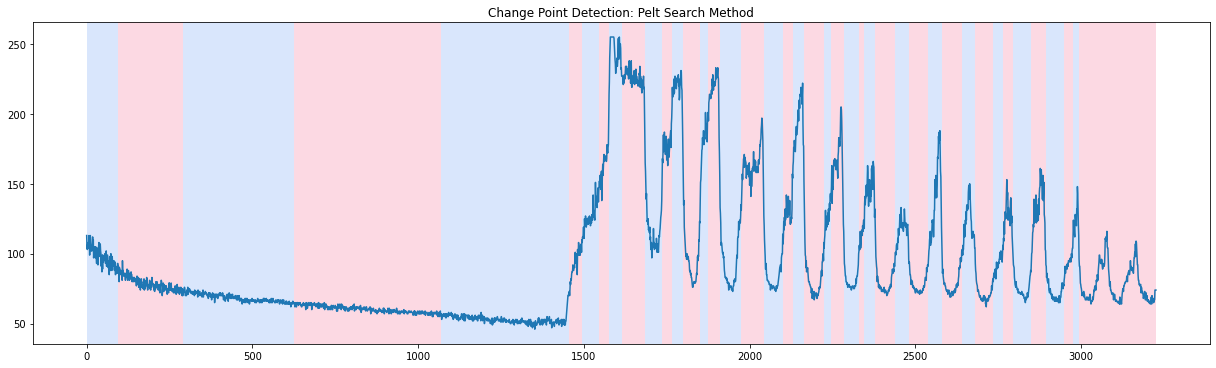

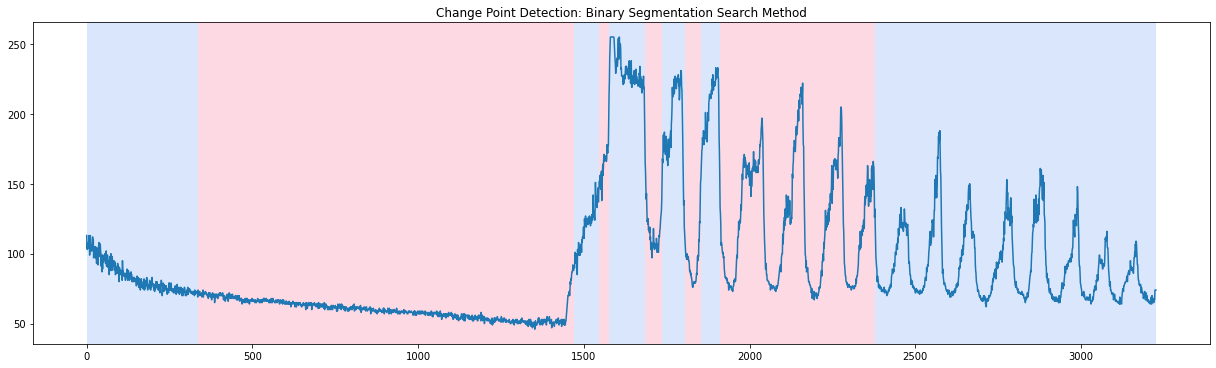

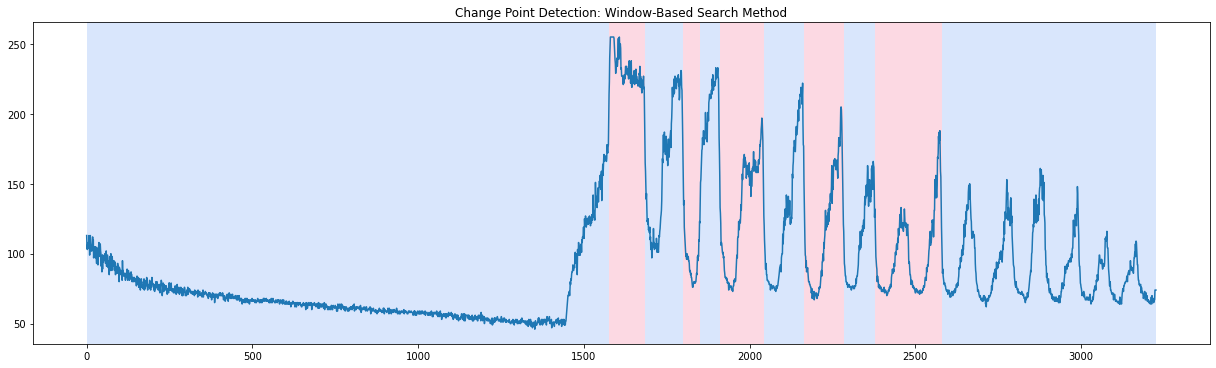

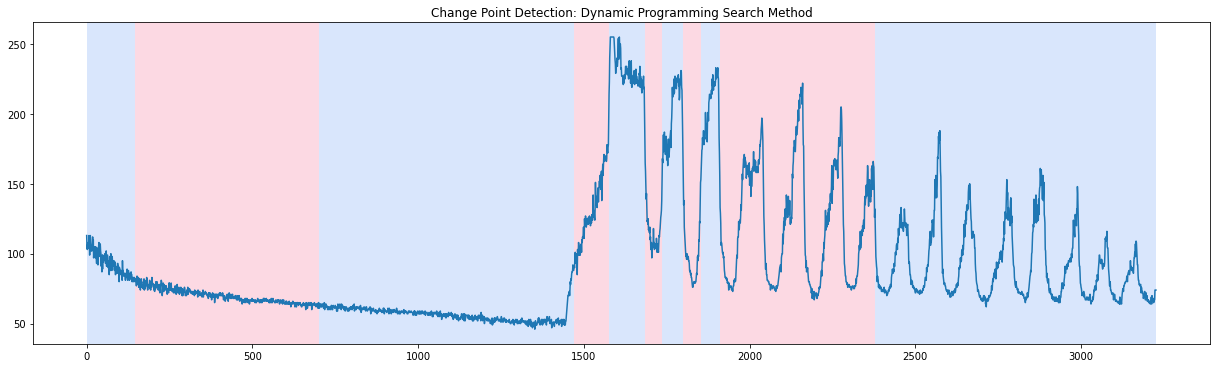

In [85]:
#Convert the time series values to a numpy 1D array
points=np.array(feat_acs[0,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result_pelt = algo.predict(pen=10)
rpt.show.display(points, result_pelt, figsize=(17, 5))
plt.title('Change Point Detection: Pelt Search Method')

#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
result_bin = algo.predict(n_bkps=10)
rpt.show.display(points, result_bin, figsize=(17, 5))
plt.title('Change Point Detection: Binary Segmentation Search Method')

#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
result_win = algo.predict(n_bkps=10)
rpt.show.display(points, result_win, figsize=(17, 5))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
result_dyn = algo.predict(n_bkps=10)
rpt.show.display(points, result_dyn, figsize=(17, 5))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

Text(0.5, 1.0, 'Anomaly Score: Air conditioner unit (7PM-4AM/01/24-25/2020)')

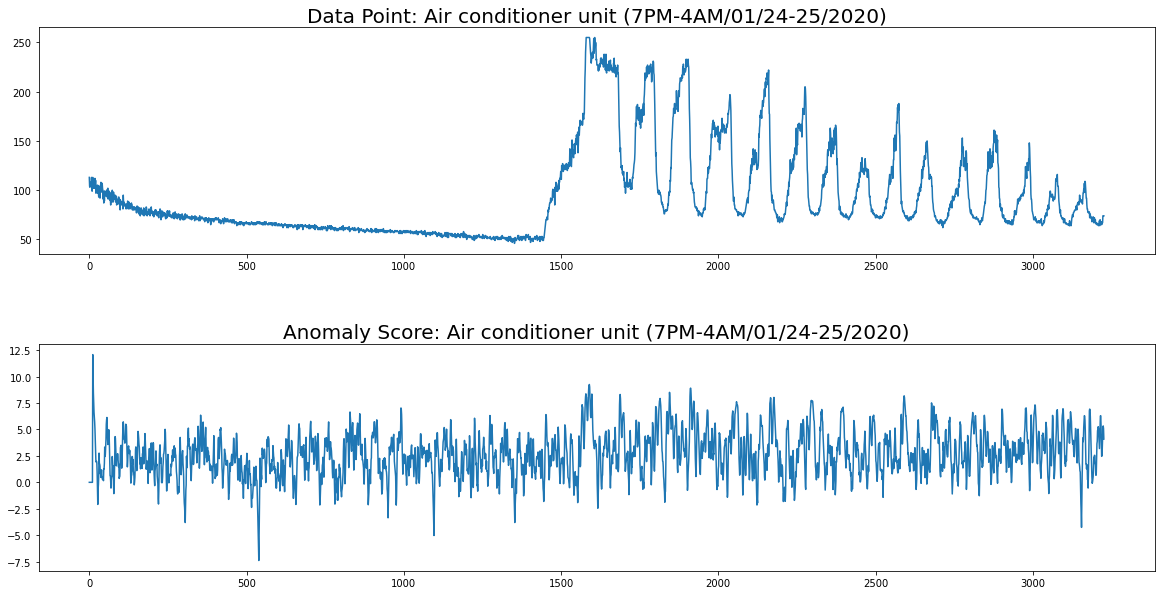

In [86]:
points=np.array(feat_acs[0,5,5,:])

#CHANGEFINDER PACKAGE
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

f.subplots_adjust(hspace=0.4)
ax1.plot(points)
ax1.set_title("Data Point: Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
ax2.plot(scores)
ax2.set_title("Anomaly Score: Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)


In [87]:
len(result_pelt), len(result_bin), len(result_win), len(result_dyn)

(42, 11, 11, 11)

# Two-state mixed hidden markov model

In [17]:
import numpy as np
#from sklearn import hmm

According to the Hidden Markov Models site here, the sklearn.hmm module has been deprecated and is scheduled for removal in the 0.17. Confirm that your scikit-learn is at least version 0.16.1 because from 0.17 you won't have sklearn.hmm. 

Warning The sklearn.hmm module has now been deprecated due to it no longer matching the scope and the API of the project. It is scheduled for removal in the 0.17 release of the project. This module has been moved to a seperate repository:


hmmlearn is a set of algorithms for unsupervised learning and inference of Hidden Markov Models. For supervised learning learning of HMMs and similar models see seqlearn.
https://github.com/hmmlearn/hmmlearn


In [18]:
!pip install hmmlearn

     |████████████████████████████████| 378kB 4.4MB/s 


# Example of building HMM and generating samples
https://hmmlearn.readthedocs.io/en/latest/tutorial.html

- GaussianHMM: Hidden MArkov Model with Gaussian emissions
- GMMHMM: Hidden MArkov Model with Gaussian mixture emissions
- MultinominalHMM: Hidden Markov Model with multinomial (discrete) emissions

In [19]:
import numpy as np
from hmmlearn import hmm

In [20]:
np.random.seed(42)

In [21]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=3, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [31]:
#Convert the time series values to a numpy 1D array
points=np.array(feat_acs[0,5,5,:])

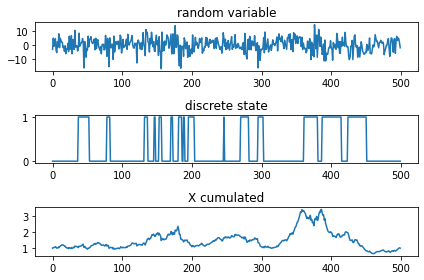

In [36]:
# Example

np.random.seed(3)
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
model.startprob_ = np.array([0.9, 0.1])
model.transmat_ = np.array([[0.95, 0.05], [0.15, 0.85]])
model.means_ = np.array([[1.0], [-3.0]])
model.covars_ = np.array([[15.0], [40.0]])
X, Z = model.sample(500)

len(np.array(feat_acs[0,5,5,:])), sum(np.array(feat_acs[0,5,5,:]))

plt.subplot(311)
plt.plot(X)
plt.title("random variable")
plt.subplot(312)
plt.plot(Z)
plt.title("discrete state")
plt.subplot(313)
plt.plot((1 + 0.01*X).cumprod())
plt.title("X cumulated")
plt.tight_layout()
plt.show()

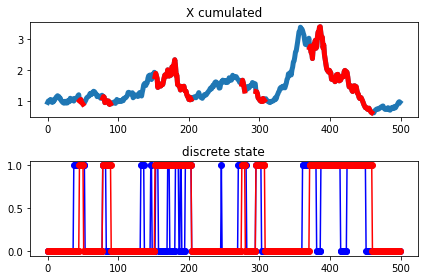

In [39]:
# Example 2

model2 = hmm.GaussianHMM(n_components=2, n_iter=len(X)).fit(X)

Z_hat = model2.decode(X)[1]
X_cum = (1 + 0.01*X).cumprod()
X_cum_hat = X_cum.copy()
X_cum_hat[Z_hat == 0] = np.nan

plt.subplot(211)
plt.plot(X_cum, lw=5)
plt.plot(X_cum_hat, 'r-', lw=5)
plt.title("X cumulated")
plt.subplot(212)
plt.plot(Z, 'bo-')
plt.plot(Z_hat, 'ro-')
plt.title("discrete state")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


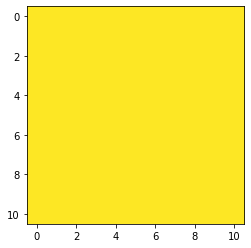

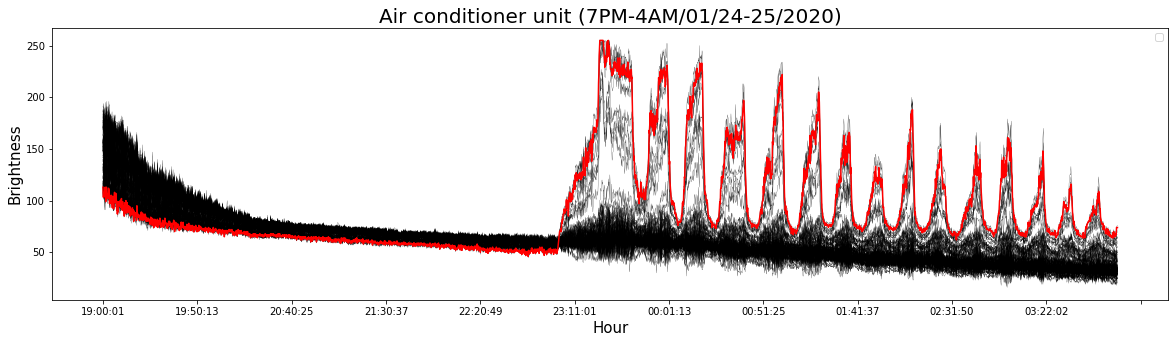

In [42]:
ind = 0 #pick one pixel from features

#Figure1
plt.imshow(feat_acs[ind][:, :, 90], clim=[0, 1])
#Figure2
plt.figure(figsize=(20,5))
dum = plt.plot(fpaths_sub.hour, feat_acs[ind].reshape(121, 3227).T, "k", lw=0.2)
dum = plt.plot(fpaths_sub.hour, feat_acs[ind][5, 5], "r")
plt.title("Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Brightness", fontsize=15)
plt.legend(loc="best")

# HMM LEARN MODEL (final)

In [ ]:
#!pip install hmmlearn

In [ ]:
#from hmmlearn import hmm

         1      -17561.7731             +nan
         2      -15118.5152       +2443.2579
         3      -14221.1718        +897.3434
         4      -13476.5242        +744.6476
         5      -12999.6353        +476.8889
         6      -12509.5327        +490.1027
         7      -12427.9558         +81.5769
         8      -12390.0847         +37.8711
         9      -12330.3357         +59.7490
        10      -12277.6648         +52.6708
No handles with labels found to put in legend.


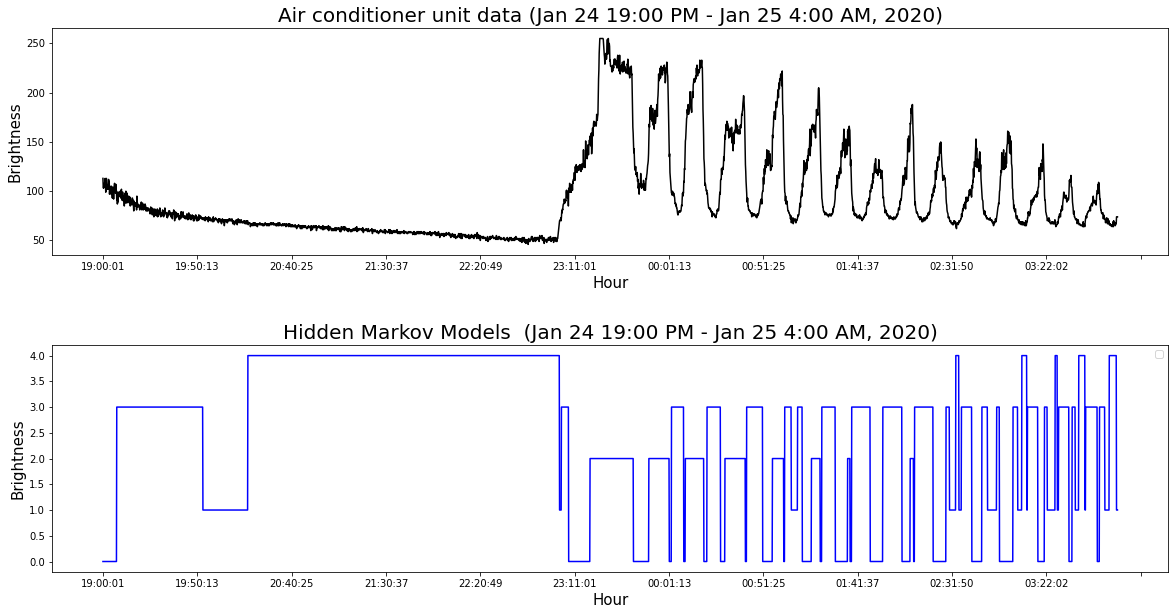

In [46]:
x = feat_acs[0,5,5,:]
x = x[~(np.isnan(x))].reshape(-1,1)

h = hmm.GaussianHMM(n_components=5, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

f.subplots_adjust(hspace=0.4)
#ax1.plot(fpaths_sub.hour, x, "red")
ax1.plot(fpaths_sub.hour, x, "black")
ax1.set_title("Air conditioner unit data (Jan 24 19:00 PM - Jan 25 4:00 AM, 2020)", fontsize=20)

ax1.set_xlabel("Hour", fontsize=15)
ax1.set_ylabel("Brightness", fontsize=15)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(300))


#ax2.plot(fpaths_sub.hour, y + 100., "yellow")
ax2.plot(fpaths_sub.hour, y, "blue")
ax2.set_title("Hidden Markov Models  (Jan 24 19:00 PM - Jan 25 4:00 AM, 2020)", fontsize=20)

ax2.set_xlabel("Hour", fontsize=15)
ax2.set_ylabel("Brightness", fontsize=15)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(300))

#ax = plt.axes()

plt.legend(loc="best")

# Standardization

In [50]:
from numpy import *

         1      -17561.7731             +nan
         2      -15118.5152       +2443.2579
         3      -14221.1718        +897.3434
         4      -13476.5242        +744.6476
         5      -12999.6353        +476.8889
         6      -12509.5327        +490.1027
         7      -12427.9558         +81.5769
         8      -12390.0847         +37.8711
         9      -12330.3357         +59.7490
        10      -12277.6648         +52.6708
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


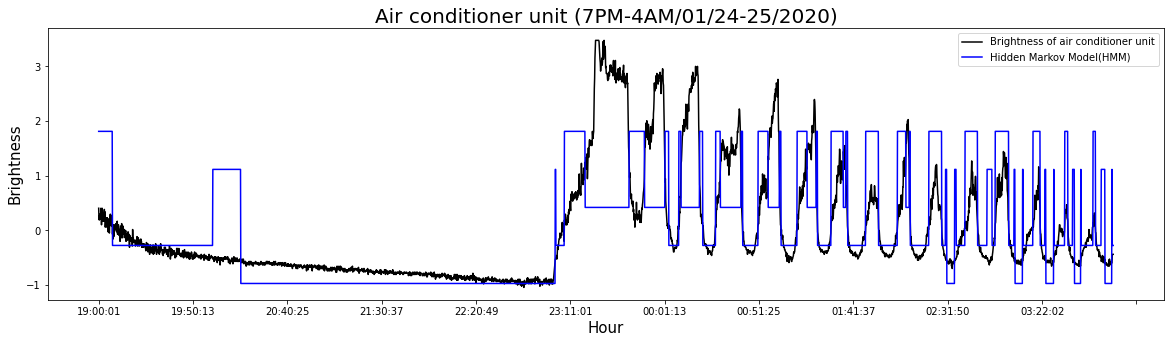

In [89]:
x = feat_acs[0,5,5,:]
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=5, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x)

# standardization using CALCULATION
std_x = (x - mean(x, axis=0)) / std(x, axis=0)
std_y = (y - mean(y, axis=0)) / std(y, axis=0)

plt.figure(figsize = (20,5))
dum = plt.plot(fpaths_sub.hour, ss_x, "black", label ="Brightness of air conditioner unit")
dum = plt.plot(fpaths_sub.hour, ss_y, "blue", label = "Hidden Markov Model(HMM)")
plt.title("Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Brightness", fontsize=15)
plt.legend(loc="best")

In [61]:
import scipy.stats as ss

         1      -17530.9627             +nan
         2      -15116.6383       +2414.3245
         3      -14222.3324        +894.3059
         4      -13473.4889        +748.8434
         5      -13043.5902        +429.8988
         6      -12539.7513        +503.8389
         7      -12412.2768        +127.4744
         8      -12356.7161         +55.5607
         9      -12300.8825         +55.8336
        10      -12247.2010         +53.6815
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


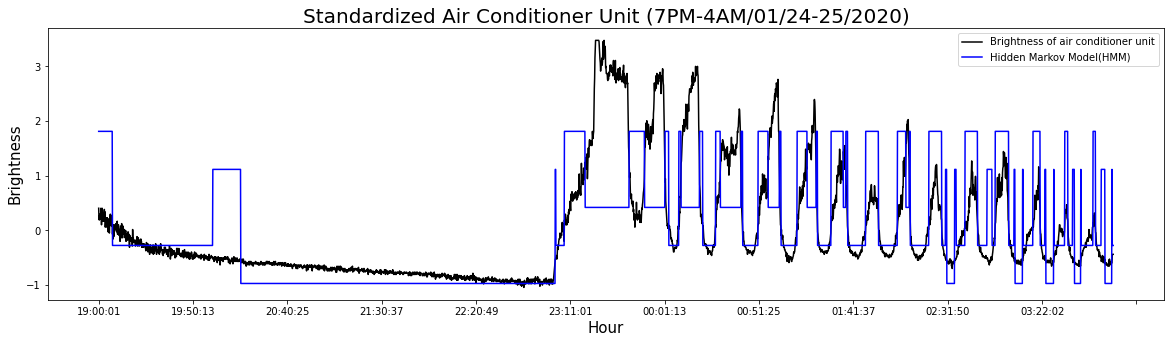

In [88]:
x = feat_acs[0,5,5,:]
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=5, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(fpaths_sub.hour, ss_x, "black", label ="Brightness of air conditioner unit")
dum = plt.plot(fpaths_sub.hour, ss_y, "blue", label = "Hidden Markov Model(HMM)")
plt.title("Standardized Air Conditioner Unit (7PM-4AM/01/24-25/2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Brightness", fontsize=15)
plt.legend(loc="best")